# Sarimax

In [586]:
import statsmodels.api as sm

In [587]:
sarima_data = Y

In [588]:
tscv = TimeSeriesSplit(max_train_size= 720, n_splits=845)
print(tscv)

TimeSeriesSplit(max_train_size=720, n_splits=845)


In [ ]:
y_pred_test = []
start_time = time.time()

for train_index, test_index in tscv.split(Y):    
    if len(train_index) >=72:

        model_fit = sm.tsa.SARIMAX(Y.iloc[train_index], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12)).fit()     
        predd = model_fit.get_forecast(steps=24).predicted_mean
        y_pred_test += list(predd)

print('time: ', time.time() - start_time) 

In [600]:
mean_absolute_error(sarima_data.iloc[96:], y_pred_test)

0.7193928792047282

## Оптимизация параметров алгоритма

In [117]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [118]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sarima_train,order=param,seasonal_order=param_seasonal)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

C:\Users\yaroslav\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:83231.04724386263
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:67828.90700472365
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:54120.70557583868
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:53553.06376798067


C:\Users\yaroslav\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:52984.166515608755
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:52826.82460076927
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:53783.0865958205
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:50350.313866838034
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:59659.66199920862
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:46962.46460928707
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:37394.37019589949
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:35715.91701852785
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:35894.853172212665
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:35150.96444863848
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:36511.17993844408
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:32720.500746040198
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8658.216397694257
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8636.652510801858
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:22654.602755203516
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:8715.499424795697


C:\Users\yaroslav\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:8638.841375614074
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:8534.644374703845
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:17844.507798637347
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:8716.758407034737
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:8659.989913641448
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:8638.625494056409
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:22654.11102439764
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:8717.714668019491
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:8640.245246386366
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8536.060791573485
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:17844.887644907605
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8718.105292190798
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:8550.153580141932
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:8534.470400534075
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:21650.07218655369
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:8372.979409165338
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:8535.814661795339
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:8454.180835939893
ARIMA(1,

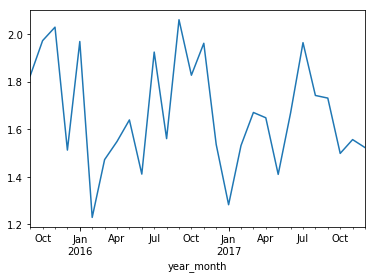

In [159]:
df_days.assign(year_month = lambda x: x.DateTime - pd.offsets.MonthEnd() + pd.offsets.MonthBegin())\
       .groupby('year_month')['target_mean'].mean().plot()